<a href="https://colab.research.google.com/github/M-M-Mujtaba/AI_HW3_Evo/blob/master/messi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from threading import Thread
from skimage import io
mutation_size = 1000
Population_Size = 100 # in 10^i
crossover_selection = 0.2
mutation_selection = 0.05
mutation_rate = 0.05
generation_limit = 10000

In [0]:
class ThreadWithReturnValue(Thread):
    def __init__(self, group=None, target=None, name=None,
                 args=(), kwargs={}, Verbose=None):
        Thread.__init__(self, group, target, name, args, kwargs)
        self._return = None

    def run(self):
        # print(type(self._target))
        if self._target is not None:
            self._return = self._target(*self._args,
                                        **self._kwargs)

    def join(self, *args):
        Thread.join(self, *args)
        return self._return


In [0]:
def show_img(img):
    # print(np.sum(np.sum(messi, axis=0), axis=0))
    plt.imshow(img)
    plt.show()

In [0]:
class Frame:
    def __init__(self, img):
        self.img = img

In [0]:
class Entity:

    def __init__(self, target):  # target is the 2d image array that we have to get to
        self.target = target.img
        self.img = np.random.random_integers(0, 255,
                                             self.target.shape)  # create a random image of the shape of target image
        self.val = 1 - (np.sum(np.abs(np.subtract(self.img, self.target))) / (
                self.target.size * 255))  # divide it by the max distance the find how close we are

    def update_val(self):  # update the evaluation value when the image is modified with crossover or mutation
        self.val = 1 - (np.sum(np.abs(np.subtract(self.img, self.target))) / (
                self.target.size * 255))  # divide it by the max distance the find how close we are

    @staticmethod
    def generate_pop(size, target):  # return a list of randomly generated population
        for i in range(size):
            yield Entity(target)


In [0]:
def crossover(plane1, plane2):

    x_point =  random.randint(1, len(plane1) - 1)
    y_point = random.randint(1, len(plane1) - 1)
    child = np.zeros((len(plane1),len(plane1)))  # initialize the child to 0s
    child[:x_point, :y_point] = plane1[:x_point, :y_point]  # copy plane 1 from initial to xpoint and ypoint in child
    child[x_point:, :] = plane2[x_point:, :]  # copy plane 2 from xpoint and ypoint till the end
    child[:, y_point:] = plane2[:, y_point:]

    return child

In [0]:
def mutation(entity):

    positions = np.random.randint(0, len(entity.img)  -1, (2, mutation_size))  # generating a starting point
    # between 0 and max size - mutation size
    # the image is 2d numpy array
    for i in range(mutation_size):
        entity.img[positions[0][i]: positions[0][i] + mutation_size,
        positions[1][i]:positions[1][i] + mutation_size] = random.randint(0, 255)


In [0]:
def Evolve(plane):
    evolv_limit = generation_limit # maximum number of generations
    evolv_index = 0  # index for generations
    Population = Entity.generate_pop(Population_Size, plane)
    Population = sorted(Population, key=lambda e: e.val, reverse=True)  # sort the populations based on the fitness
    # value , maximum values at top

    best_entity = Population[0]  # the first image is the best randomly generated image
    # show_img(best_entity.img)
    pop_square = Population_Size * Population_Size
    choices = [Population[i].val * (pop_square - i * i) for i in range(Population_Size)]  # The Roulet
    # wheel to decide which child to be selected, probability of selection would be proportional to its fitness value

    # run until we converge to the target or we reach our generational limit
    while best_entity.val != 1 and evolv_index < evolv_limit:
        x = random.choices(Population, weights=choices, k=int(Population_Size* crossover_selection))  # get the top
        # crossover_(selection * 100) % of populations based on their proportional probability
        y = random.choices(Population, weights=choices, k=int(Population_Size* crossover_selection))
        new_population = []
        new_population.append(Population[0])
        new_population.append(Population[1])
        mutation_selection = (((evolv_limit + 1 - evolv_index) / evolv_limit) * 0.5 + 0.05)
        for i in range(Population_Size-2):
            parent1 = x[i % int(Population_Size * crossover_selection)]
            parent2 = y[i % int(Population_Size * crossover_selection)]
            child = Entity(plane)
            child.img = crossover(parent1.img, parent2.img)
            if random.randint(0, int(1 / mutation_selection)) == 1:
                mutation(child)
                # print("mutated")
            child.update_val()
            new_population.append(child)

        evolv_index += 1
        print(evolv_index)
        Population = sorted(new_population, key=lambda e: e.val, reverse=True)
        if Population[0].val > best_entity.val:
            print("New best found at generation {} with val{}".format(evolv_index, best_entity.val))
            best_entity = Population[0]
            # show_img(best_entity.img)
        choices = [Population[i].val * (pop_square - i * i) for i in range(Population_Size)]

    return best_entity.img

In [0]:
def main():
    messi = io.imread('face.png')
    print(messi.shape)
    final_img = np.zeros(messi.shape, dtype=int)
    Threads = []
    #Music = Thread(target=musiconloop, args=('boomboom.mp3',) )
    #Music.start()
    # create thread for each layer and evolve them simultaneously
    for i in range(messi.shape[2]):
        arg_to_send = Frame(messi[:, :, i])
        Threadd = ThreadWithReturnValue(target=Evolve, args=(arg_to_send,))
        Threads.append(Threadd)
    for i in range(messi.shape[2]):
        Threads[i].start()
    for i in range(messi.shape[2]):
        final_img[:, :, i] = Threads[i].join()
    # for i in range(messi.shape[2]):
    #     final_img[:,:,i] = messi[:,:,i]
    final_img = np.reshape(final_img, (messi.shape))
    show_img(final_img)

(250, 250, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  


Streaming output truncated to the last 5000 lines.
8789
8783
8716
8790
8750
8784
8791
8751
8717
8785
8792
8718
8793
8752
8786
8719
8753
8794
8787
8720
8795
8788
8754
8796
8721
8789
8797
8755
8722
8790
8798
8756
8791
8799
8723
8757
8724
8800
8792
8758
8725
8793
8801
8759
8802
8726
8794
8760
8803
8795
8727
8761
8796
8804
8762
8728
8805
8797
8729
8763
8798
8806
8730
8799
8764
8731
8807
8800
8765
8732
8808
8801
8766
8733
8809
8802
8734
8767
8810
8803
8768
8811
8735
8804
8769
8812
8736
8805
8770
8813
8737
8806
8771
8814
8738
8807
8808
8772
8739
8815
8809
8773
8816
8740
8810
8774
8741
8817
8811
8742
8818
8775
8812
8819
8743
8776
8813
8820
8744
8777
8821
8814
8745
8778
8822
8815
8746
8823
8779
8747
8816
8824
8780
8817
8748
8825
8781
8749
8818
8782
8826
8750
8819
8827
8783
8751
8820
8828
8784
8829
8752
8821
8822
8785
8753
8830
8754
8823
8831
8786
8824
8755
8832
8787
8825
8833
8756
8788
8826
8834
8757
8789
8835
8827
8758
8836
8790
8828
8837
8759
8791
8829
8760
8792
8838
8830
8839
8793
8761
8794

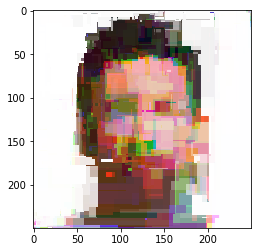

In [10]:
main()